In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
parameters = {
    "SIKE" : ['p434', 'p503', 'p610', 'p751'],
    "BSIKE" : ['p253', 'p255', 'p247', 'p237', 'p257'],
    "HSIKE" : [{
      "a": 6,
      "b": 16,
      "c": 6
    }]
}

In [2]:
from EdwardsCurve import TwistedEdwardCurve
from sibc.sidh import SIKE
from sibc.bsidh import BSIKE
from HSIKE import HECCurveDSA
from crypto.python.EccApp import validate

Server 1 public key: ( 215038169422561698753426815318517922179049384054841151193296035083634742027 ,  32551943271895547269944355983776221484740659303220223036934151223223133433621 )
Server 2 public key: ( 60294293536837295398015591980915288205227024183127159734175104214587032242371 ,  12005364070981499301582180522884398077496580768774001282112982223560315063810 )


In [12]:
def TEC():
    di = {}
    tec = TwistedEdwardCurve()
    msg = tec.message

    start = time.time()
    pk, sk = tec.KeyGen()

    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(str(sk).encode('utf-8')))
    print("Public Key Size: ", len(str(pk[0]).encode('utf-8')) * 2)
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(str(sk).encode('utf-8'))
    di["PK Size"] = len(str(pk[0]).encode('utf-8')) * 2
    di["Key Gen Time"]  = key_gen_time

    start = time.time()
    R, s = tec.sign(pk, sk)
    end = time.time()
    sign_time = end-start
    print("Time Taken to Sign", sign_time)
    print("Signature Size", len(str(s).encode('utf-8')), "bytes")

    start = time.time()
    verify_true = tec.verify(R, s, pk)
    end = time.time()
    verify_time = end-start
    print("Time Taken to Verify", verify_time)
    print("Is signature correct ? ", verify_true)

    di["Sign Size"] = len(str(s).encode('utf-8'))
    di["Sign Time"] = sign_time
    di["Verify Time"] = verify_time
    di["Name"] = 'TEC'

    return di

def SIKE_wrapper(params):
    di = {}
    sike = SIKE('montgomery', params, False, False)

    start = time.time()
    s, sk3, pk3 = sike.KeyGen()

    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk3))
    print("Public Key Size: ", len(pk3))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk3) 
    di["PK Size"] = len(pk3)
    di["Key Gen Time"]  = key_gen_time

    start = time.time()
    c, K = sike.Encaps(pk3)
    end = time.time()
    sign_time = end-start
    print("Time Taken to Sign", sign_time)
    print("Signature Size", len(str(s).encode('utf-8')), "bytes")

    start = time.time()
    K_ = sike.Decaps((s, sk3, pk3), c)
    verify_true = K == K_
    end = time.time()
    verify_time = end-start
    print("Time Taken to Verify", verify_time)
    print("Is signature correct ?", verify_true)

    di["Sign Size"] = len(str(s).encode('utf-8'))
    di["Sign Time"] = sign_time
    di["Verify Time"] = verify_time

    return di

def BSIKE_wrapper(params):
    di = {}
    bsike = BSIKE('montgomery', params, 'hvelu', True, False, False, False)

    start = time.time()
    s, sk3, pk3 = bsike.KeyGen()

    end = time.time()
    key_gen_time = end-start
    print("Secret Key Size: ", len(sk3))
    print("Public Key Size: ", len(pk3))
    print("Time Taken to Generate Keys", key_gen_time)
    di["SK Size"] = len(sk3) 
    di["PK Size"] = len(pk3)
    di["Key Gen Time"]  = key_gen_time

    start = time.time()
    c, K = bsike.Encaps(pk3)
    end = time.time()
    sign_time = end-start
    print("Time Taken to Sign", sign_time)
    print("Signature Size", len(str(s).encode('utf-8')), "bytes")

    start = time.time()
    K_ = bsike.Decaps((s, sk3, pk3), c)
    verify_true = K == K_
    end = time.time()
    verify_time = end-start
    print("Time Taken to Verify", verify_time)
    print("Is signature correct ?", verify_true)

    di["Sign Size"] = len(str(s).encode('utf-8'))
    di["Sign Time"] = sign_time
    di["Verify Time"] = verify_time

    return di

def HSIKE_wrapper(a, b, c):
    di = {}
    hsike = HECCurveDSA(a, b, c)

    start = time.time()
    pk, sk = hsike.KeyGen()
    end = time.time()
    key_gen_time = end-start

    pub_key = str(pk[0]) + str(pk[1])

    print("Secret Key Size: ", len(str(sk).encode('utf-8')))
    print("Public Key Size: ", len(pub_key.encode('utf-8')))
    print("Time Taken to Generate Keys", key_gen_time)

    di["SK Size"] = len(str(sk).encode('utf-8')) 
    di["PK Size"] = len(pub_key.encode('utf-8'))
    di["Key Gen Time"]  = key_gen_time

    start = time.time()
    R, s = hsike.sign(pk, sk)
    end = time.time()
    sign_time = end-start

    secret = str(R[0])

    print("Time Taken to Sign", sign_time)
    print("Signature Size", len(secret.encode('utf-8')) + 20, " bytes")

    start = time.time()
    verify_true = hsike.verify(R, s, pk)
    end = time.time()
    verify_time = end-start

    print("Time Taken to Verify", verify_time)
    print("Is signature correct ?", verify_true)

    di["Sign Size"] = len(secret.encode('utf-8'))
    di["Sign Time"] = sign_time
    di["Verify Time"] = verify_time

    return di

In [13]:
val_arr = []

for param_set in parameters['SIKE']:
    d = SIKE_wrapper(param_set)
    d["Variants"] = "SIKE-" + param_set
    val_arr.append(d)

for param_set in parameters['BSIKE']:
    d = BSIKE_wrapper(param_set)
    d["Variants"] = "BSIKE-" + param_set
    val_arr.append(d)    

for param_set in parameters['HSIKE']:
    d = HSIKE_wrapper(param_set['a'], param_set['b'], param_set['c'])
    d["Variants"] = "HSIKE-" + "a" + str(param_set['a']) + "b" + str(param_set['b']) + "c" + str(param_set['c'])
    val_arr.append(d)   

Secret Key Size:  55
Public Key Size:  330
Time Taken to Generate Keys 0.24810457229614258
Time Taken to Sign 0.36432313919067383
Signature Size 46 bytes
Time Taken to Verify 0.3898756504058838
Is signature correct ? True
Secret Key Size:  63
Public Key Size:  378
Time Taken to Generate Keys 0.2662625312805176
Time Taken to Sign 0.5070664882659912
Signature Size 37 bytes
Time Taken to Verify 0.5065908432006836
Is signature correct ? True
Secret Key Size:  77
Public Key Size:  462
Time Taken to Generate Keys 0.3663303852081299
Time Taken to Sign 0.6877501010894775
Signature Size 75 bytes
Time Taken to Verify 0.7120795249938965
Is signature correct ? True
Secret Key Size:  94
Public Key Size:  564
Time Taken to Generate Keys 0.7675666809082031
Time Taken to Sign 0.9723353385925293
Signature Size 98 bytes
Time Taken to Verify 0.9492993354797363
Is signature correct ? True
Secret Key Size:  32
Public Key Size:  192
Time Taken to Generate Keys 9.08316969871521
Time Taken to Sign 31.40322589

In [14]:
df = pd.DataFrame(val_arr)
df.to_csv("result-all-param.csv", encoding='utf-8', index=False)
df.head(14)

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Variants
0,55,330,0.248105,46,0.364323,0.389876,SIKE-p434
1,63,378,0.266263,37,0.507066,0.506591,SIKE-p503
2,77,462,0.366330,75,0.687750,0.712080,SIKE-p610
3,94,564,0.767567,98,0.972335,0.949299,SIKE-p751
4,32,192,9.083170,61,31.403226,37.085084,BSIKE-p253
5,32,192,16.488605,55,13.426491,14.945852,BSIKE-p255
6,31,186,9.649208,55,6.549820,9.475049,BSIKE-p247
7,30,180,29.877934,49,1.037291,11.051111,BSIKE-p237
8,33,198,1.180999,40,11.630277,8.706321,BSIKE-p257
9,77,58,0.710184,77,1.665617,1.902989,HSIKE-a6b16c6


In [15]:
df = df.round(3) 
df

,SK Size,PK Size,Key Gen Time,Sign Size,Sign Time,Verify Time,Variants
0,55,330,0.248,46,0.364,0.390,SIKE-p434
1,63,378,0.266,37,0.507,0.507,SIKE-p503
2,77,462,0.366,75,0.688,0.712,SIKE-p610
3,94,564,0.768,98,0.972,0.949,SIKE-p751
4,32,192,9.083,61,31.403,37.085,BSIKE-p253
5,32,192,16.489,55,13.426,14.946,BSIKE-p255
6,31,186,9.649,55,6.550,9.475,BSIKE-p247
7,30,180,29.878,49,1.037,11.051,BSIKE-p237
8,33,198,1.181,40,11.630,8.706,BSIKE-p257
9,77,58,0.710,77,1.666,1.903,HSIKE-a6b16c6


In [4]:
def plot_bar_multi_columns(data, x_col, y_cols, y_label, colormap='viridis'):
    """
    Create a bar plot for multiple columns in a Pandas DataFrame with a gap between groups.

    Parameters:
    - data: The DataFrame containing the data to be plotted.
    - x_col: The name of the column to be used as the X-axis.
    - y_cols: A list of column names to be used as Y-axes.
    """
    # Extract X and Y data from the DataFrame
    x_data = data[x_col]
    y_data = data[y_cols]

    # Number of bars (Y-axes)
    num_y_axes = len(y_cols)

    # Set up the figure and axis with a larger figsize
    fig, ax = plt.subplots(figsize=(16, 10))

    # Width of each group of bars
    group_width = 1
    bar_width = (group_width / num_y_axes)-0.2

    # Define color options for bars
    colors = ['g', 'y', 'm', 'b', 'r', 'c', 'k']

    # Loop through each Y-axis and create a bar for each
    for i in range(num_y_axes):
        x_positions = [x + i * bar_width for x in range(len(x_data))]
        y_values = y_data[y_cols[i]]
        color = colors[i % len(colors)]  # Cycle through colors

        ax.bar(x_positions, y_values, width=bar_width, label=y_cols[i], color=color)

        # Add annotations to the bars
        for x, y in zip(x_positions, y_values):
            ax.text((x + bar_width / 2)-0.4, y, str(y), ha='center', va='bottom')

    # Set the X-axis labels and legend
    ax.set_xticks([(x + (group_width / 2))-0.5 for x in range(len(x_data))])
    ax.set_xticklabels(x_data, rotation=90, va='top')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_label)
    ax.legend()


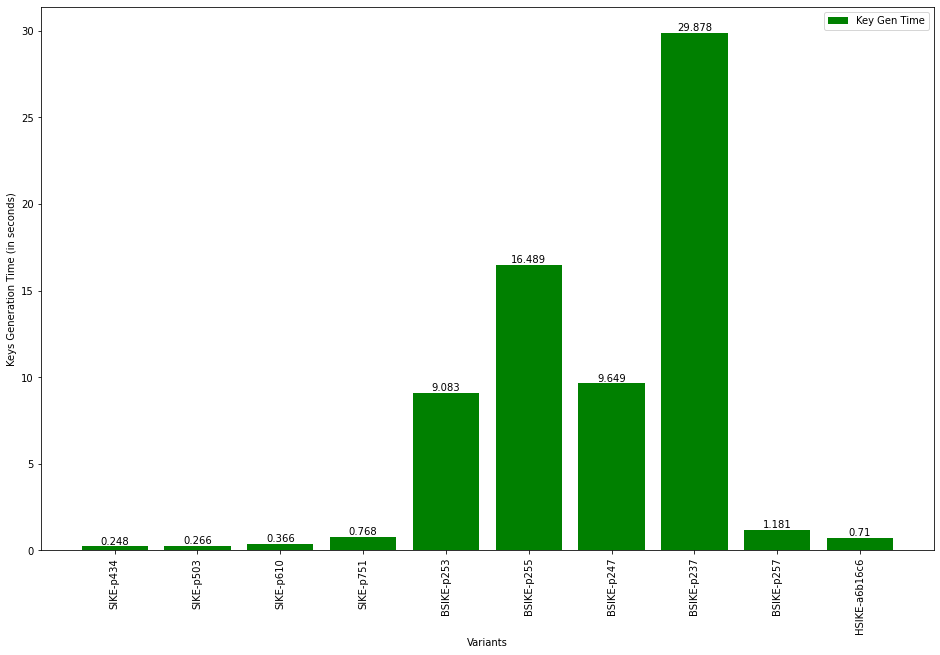

In [17]:
plot_bar_multi_columns(df, 'Variants', ["Key Gen Time"], "Keys Generation Time (in seconds)", 'hsv')

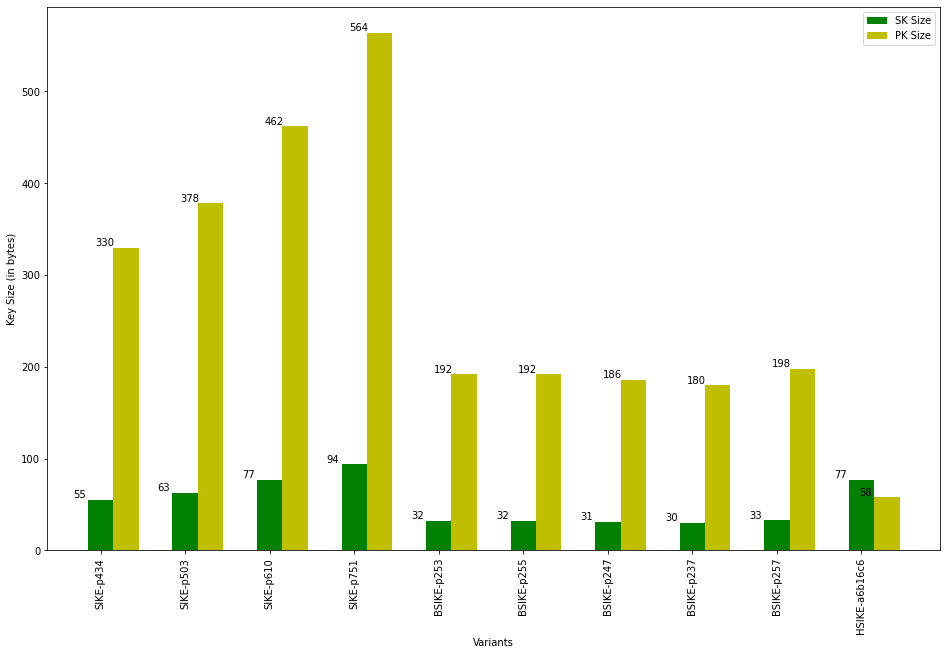

In [18]:
plot_bar_multi_columns(df, 'Variants', ["SK Size","PK Size"], "Key Size (in bytes)")

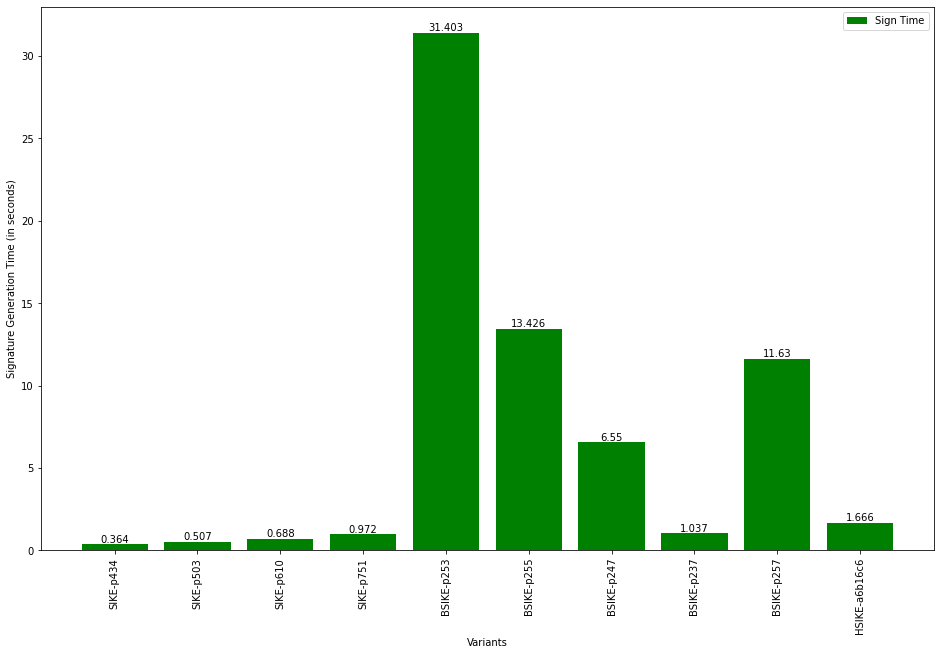

In [19]:
plot_bar_multi_columns(df, 'Variants', ["Sign Time"], "Signature Generation Time (in seconds)")

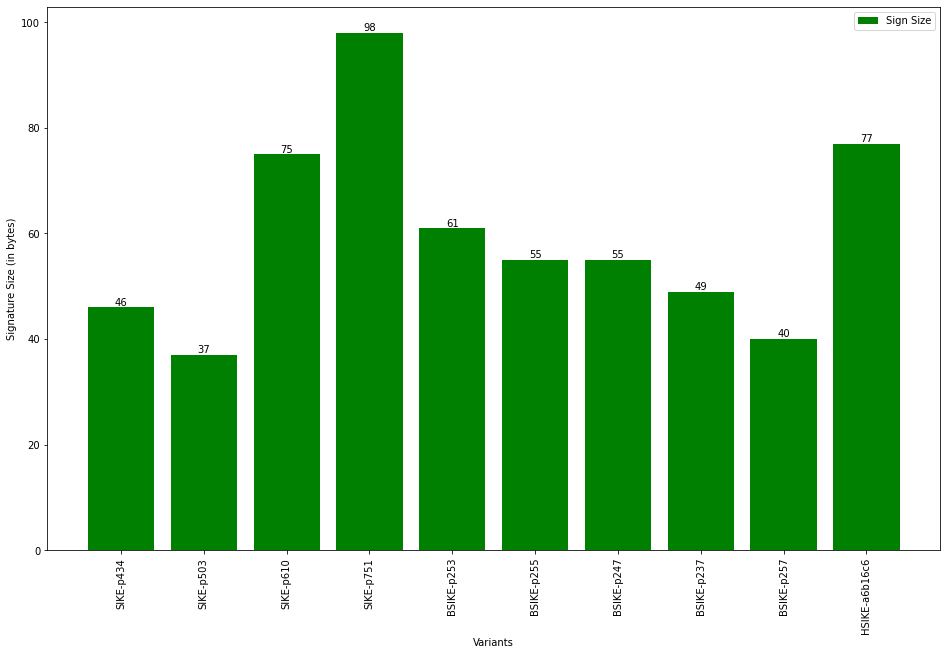

In [20]:
plot_bar_multi_columns(df, 'Variants', ["Sign Size"], "Signature Size (in bytes)")

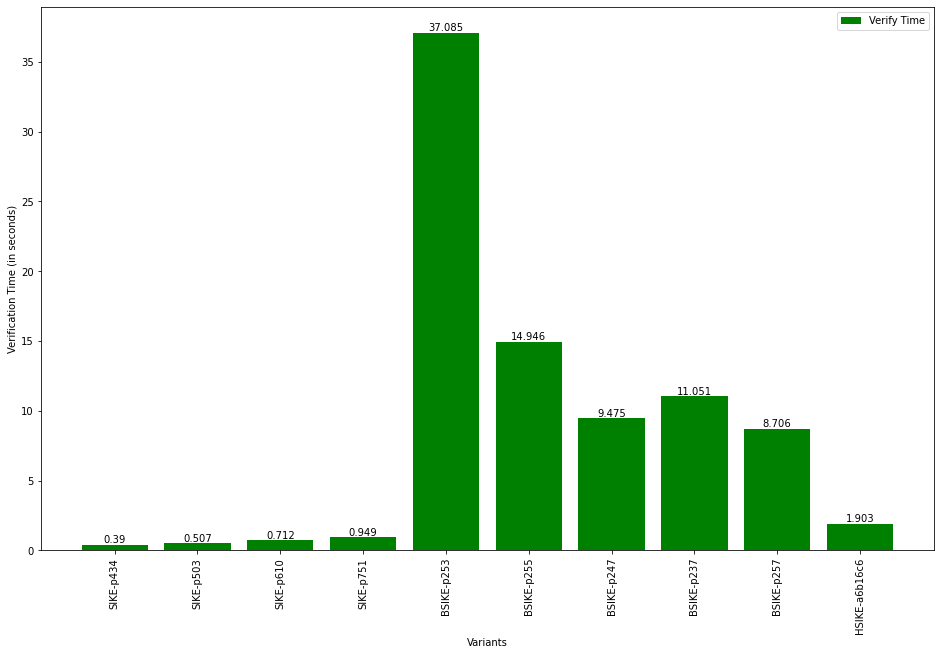

In [21]:
plot_bar_multi_columns(df, 'Variants', ["Verify Time"], "Verification Time (in seconds)")

In [15]:
df2 = df.sort_values(by=['Sign Size'])

In [4]:

start = time.time()

print(validate("hi alexa",True))

end = time.time()
key_gen_time = end-start
print(key_gen_time)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial configuration

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Curve: y^2 = x^3 +  121666 *x +  121665  mod  57896044618658097711785492504343953926634992332820282019728792003956564819949  , #F( 57896044618658097711785492504343953926634992332820282019728792003956564819949 ) =  115792089237316195423570985008687907852837564279074904382605163141518161494337
Base point: ( 55066263022277343669578718895168534326250603453777594175500187360389116729240 ,  32670510020758816978083085130507043184471273380659243275938904335757337482424 )
Password:  hi alexa
B2:-
0xaa18cd4e8f34cdeddd894c01871acc90bbff9cbd4a39808e67895989afba7b3b4f0fef9c0e5ddc71dfc32b568bf6cf4bce909bf91ac6db49aa02a34d56f26c31

-----------------

In [5]:
start = time.time()

print(validate("hi alexa",False))

end = time.time()
key_gen_time = end-start
print(key_gen_time)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial configuration

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Curve: y^2 = x^3 +  121666 *x +  121665  mod  57896044618658097711785492504343953926634992332820282019728792003956564819949  , #F( 57896044618658097711785492504343953926634992332820282019728792003956564819949 ) =  115792089237316195423570985008687907852837564279074904382605163141518161494337
Base point: ( 55066263022277343669578718895168534326250603453777594175500187360389116729240 ,  32670510020758816978083085130507043184471273380659243275938904335757337482424 )
Password:  hi alexa
B2:-
0x9271b084ed6fa0cee86938e1bd352a63c37eb91878276a59053cb3764f6f25aabbe7206cfd97e51d98482bb59e7a789b28f7b4f4cd7868c42a38763b5317cc8c

-----------------

In [3]:
start = time.time()

print(validate("hi alexa",False))


end = time.time()
key_gen_time = end-start
print("HEC ", key_gen_time)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial configuration

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Curve: y^2 = x^3 +  121666 *x +  121665  mod  57896044618658097711785492504343953926634992332820282019728792003956564819949  , #F( 57896044618658097711785492504343953926634992332820282019728792003956564819949 ) =  115792089237316195423570985008687907852837564279074904382605163141518161494337
Base point: ( 55066263022277343669578718895168534326250603453777594175500187360389116729240 ,  32670510020758816978083085130507043184471273380659243275938904335757337482424 )
Password:  hi alexa
B2:-
0x7fea5672c6b986acf1d0274e0346b8485a80b68b641ff07c2022dfe1844f1ac541d61898ad5496fdc6a098f9c29fda612a96c001de91ae8a02488799fd90c85a

-----------------

In [7]:
start = time.time()

print(validate("hi alexa",False))

end = time.time()
key_gen_time = end-start
print("ECC ", key_gen_time)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial configuration

----------------------------------------------------------------------------------------------------------------------------------------------------------------------
Curve: y^2 = x^3 +  0 *x +  7  mod  115792089237316195423570985008687907853269984665640564039457584007908834671663  , #F( 115792089237316195423570985008687907853269984665640564039457584007908834671663 ) =  115792089237316195423570985008687907852837564279074904382605163141518161494337
Base point: ( 55066263022277343669578718895168534326250603453777594175500187360389116729240 ,  32670510020758816978083085130507043184471273380659243275938904335757337482424 )

Password:  hi alexa
B2:-
0xe451c5c4d188e9499c81d1a238eea5f174294c1e5174d1fd83dd26b54490b87f4ef0373ed7b2a648e8ebdd1c5922fa4fa959d17d4bb9500b7a30e75f0330b375

------------------------

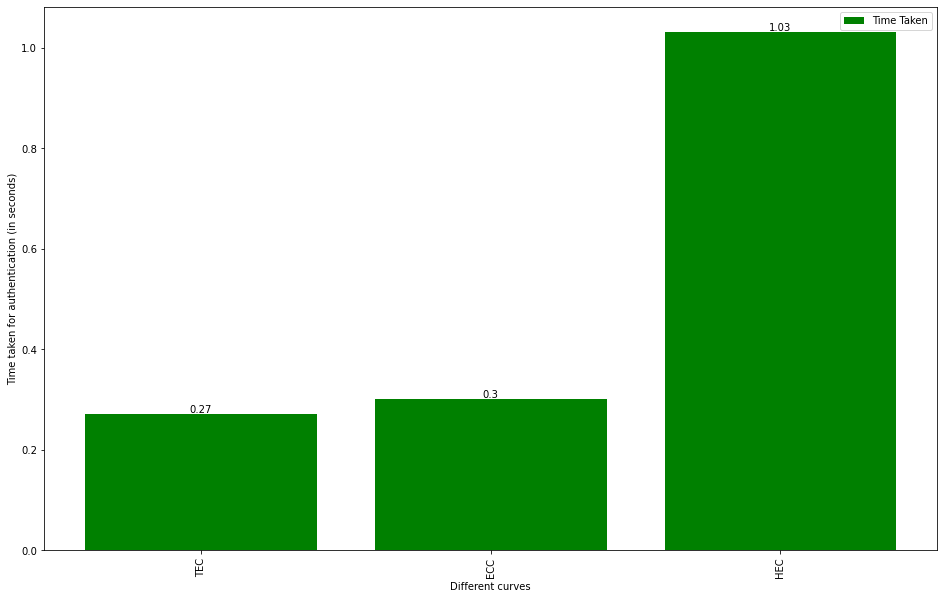

In [6]:
val_arr = [{
  "Time Taken": 0.27,
  "Different curves": 'TEC'
},{
  "Time Taken": 0.30,
  "Different curves": 'ECC'
},{
  "Time Taken": 1.03,
  "Different curves": 'HEC'
}]

df = pd.DataFrame(val_arr)
plot_bar_multi_columns(df, 'Different curves', ["Time Taken"], "Time taken for authentication (in seconds)")